<a href="https://colab.research.google.com/github/AdamMcCloskey381/Udemy-ML/blob/main/resampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import numpy as np

In [83]:
df = pd.read_csv("/content/daneDMcsv (1).csv", delimiter = ";")

In [84]:
df["y"].value_counts()

0    3398
1     413
Name: y, dtype: int64

In [85]:
df["y"].value_counts()/len(df)

0    0.891629
1    0.108371
Name: y, dtype: float64

In [86]:
df.isna().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
previous          0
poutcome          0
cons.price.idx    0
cons.conf.idx     0
y                 0
dtype: int64

In [87]:
df.dtypes

age                 int64
job                 int64
marital             int64
education           int64
housing             int64
loan                int64
contact             int64
month               int64
day_of_week         int64
campaign            int64
previous            int64
poutcome            int64
cons.price.idx    float64
cons.conf.idx     float64
y                   int64
dtype: object

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([3398.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         413.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

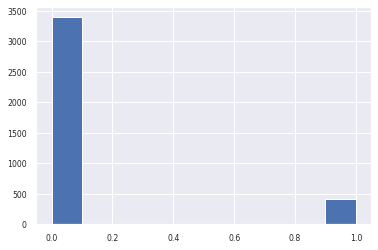

In [89]:
sns.set(font_scale = 0.7)
plt.hist(x = df["y"])

In [90]:
#resampling the observations
X = df.loc[:, df.columns != "y"]
y = df.loc[:, df.columns == "y"]

In [91]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
x_res, y_res = rus.fit_resample(X, y)

In [92]:
x_res = pd.DataFrame(x_res)
y_res = pd.DataFrame(y_res)

In [93]:
x_res["y"] = y_res
df_resampled = x_res.copy()

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
X_resampled = df_resampled.iloc[:, :-1]
y_resampled = df_resampled.iloc[:, -1]

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resampled, y_resampled, test_size = 0.25, random_state = 42)

In [98]:
rfc1 = RandomForestClassifier()
rfc2 = RandomForestClassifier()

In [100]:
y_train = np.ravel(y_train)
y_resampled_train = np.ravel(y_resampled_train)
rfc1.fit(X_train, y_train)
rfc2.fit(X_resampled_train, y_resampled_train)

RandomForestClassifier()

In [101]:
from sklearn.metrics import accuracy_score

In [104]:
score1 = accuracy_score(y_test, rfc1.predict(X_test))
score2 = accuracy_score(y_resampled_test, rfc2.predict(X_resampled_test))

In [105]:
score1

0.8982161594963274

In [107]:
score2

0.714975845410628

In [108]:
from sklearn.model_selection import cross_val_score

In [110]:
score1 = cross_val_score(rfc1, X_train, y_train, cv = 10, verbose = True, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.1s finished


In [112]:
score1.mean()

0.8964335664335664

In [113]:
score2 = cross_val_score(rfc2, X_resampled_train, y_resampled_train, cv = 10, verbose = True, n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.9s finished


In [114]:
score2.mean()

0.6945795875198308